In [4]:
#数値計算ライブラリ
import numpy as np
import pandas as pd

#可視化ライブラリ
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

#sklearnの標準化モジュールをインポート
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis as FA
from sklearn.decomposition import PCA

In [5]:
#csvファイルを読み込む
importname = "SDtui.csv"
df = pd.read_csv(importname,header = 0, sep = ",", index_col = None, encoding = "utf_8")
print(df)

    アンケート番号  回答者番号  嫌い-好き  平面的-立体的  激しい^穏やかな  機械的-人間的  閉鎖的-開放的  予想外な動き-予想内の動き  \
0     0.207      1     -1        2         1       -2        2             -1   
1     0.207      2     -1       -2         0        0        0              0   
2     0.207      3     -3       -3         3       -3       -3             -2   
3     0.207      4     -2       -1         1        1        0             -1   
4     0.207      5     -3       -2         2       -1       -1             -3   
5     0.207      6      1        1         2        1        2              1   
6     0.207      7     -2       -3         2       -2       -2             -3   
7     0.207      8     -2        0         1        0       -1             -1   
8     0.207      9     -2        1         2        0       -1             -3   
9     0.207     10     -2       -2         1       -3       -2             -1   
10    0.455      1      0        2        -1       -1        2              2   
11    0.455      2     -2   

In [6]:
df1 = df["アンケート番号"]
df2 = df["回答者番号"]

#データを成形する,アンケート番号と回答者番号の列を削除
df = df.drop(["アンケート番号","回答者番号"], axis=1)
print(df)

    嫌い-好き  平面的-立体的  激しい^穏やかな  機械的-人間的  閉鎖的-開放的  予想外な動き-予想内の動き  気持ちの悪い-気持ちの良い  \
0      -1        2         1       -2        2             -1             -1   
1      -1       -2         0        0        0              0             -1   
2      -3       -3         3       -3       -3             -2             -2   
3      -2       -1         1        1        0             -1             -1   
4      -3       -2         2       -1       -1             -3             -3   
5       1        1         2        1        2              1              0   
6      -2       -3         2       -2       -2             -3             -3   
7      -2        0         1        0       -1             -1             -1   
8      -2        1         2        0       -1             -3             -3   
9      -2       -2         1       -3       -2             -1             -1   
10      0        2        -1       -1        2              2              0   
11     -2       -2         2        0   

In [7]:
#基本統計量を表示
df.describe().apply(lambda s: s.apply(lambda x: format(x, "g")))

,嫌い-好き,平面的-立体的,激しい^穏やかな,機械的-人間的,閉鎖的-開放的,予想外な動き-予想内の動き,気持ちの悪い-気持ちの良い,つまらない-おもしろい,断続的な動き-連続的な動き,迫力が乏しい-迫力がある,非現実的-現実的,人工的な-自然な
count,50,50,50,50,50,50,50,50,50,50,50,50
mean,0.24,0.62,-0.06,-0.48,0.6,-0.76,0.26,0.44,0.92,0.26,-0.5,-0.4
std,1.7445,1.61485,1.71916,1.32849,1.5253,1.68499,1.7239,1.72804,1.45462,1.81614,1.55511,1.45686
min,-3,-3,-3,-3,-3,-3,-3,-3,-3,-3,-3,-3
25%,-1,-1,-1,-1,0,-2,-1,-0.75,0,-1,-2,-1
50%,1,1,0,-0.5,1,-1,0,1,1,1,-0.5,-1
75%,2,2,1,0,2,0.75,2,2,2,2,1,1
max,3,3,3,2,3,3,3,3,3,3,3,3


In [8]:
#データを変換する計算式を生成
sc = StandardScaler()
sc.fit(df)

#実際にデータを変換
z = sc.transform(df)

print(z)
print(z.shape)

[[-0.71802363  0.86324217  0.62284014 -1.15576822  0.92717265 -0.14388034
  -0.73832068 -0.25720881  0.75       -0.70082243 -0.3247849  -0.41602515]
 [-0.71802363 -1.63890904  0.0352551   0.36497944 -0.39735971  0.45562108
  -0.73832068 -0.84177427 -0.63888889 -0.70082243  0.3247849  -0.41602515]
 [-1.87612627 -2.26444685  1.79801022 -1.91614205 -2.38415824 -0.74338176
  -1.32428948 -2.01090521 -2.72222222 -1.813239   -0.9743547  -1.10940039]
 [-1.29707495 -1.01337124  0.62284014  1.12535327 -0.39735971 -0.14388034
  -0.73832068 -0.84177427 -0.63888889 -0.70082243  0.9743547   0.97072534]
 [-1.87612627 -1.63890904  1.21042518 -0.39539439 -1.05962589 -1.34288319
  -1.91025827 -2.01090521 -1.33333333 -1.813239   -0.9743547  -0.41602515]
 [ 0.440079    0.23770437  1.21042518  1.12535327  0.92717265  1.0551225
  -0.15235189  0.32735666  0.05555556 -0.70082243  0.9743547   0.2773501 ]
 [-1.29707495 -2.26444685  1.21042518 -1.15576822 -1.72189206 -1.34288319
  -1.91025827 -1.42633974  0.0555

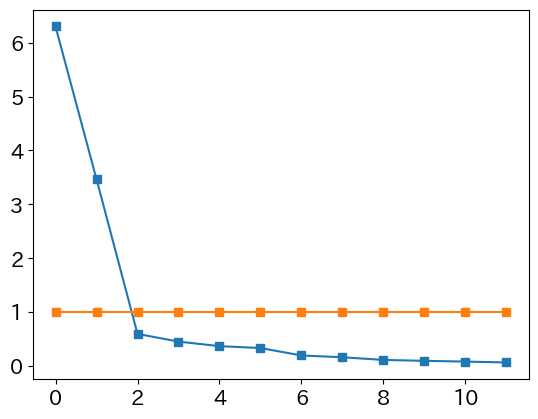

In [9]:
#主成分分析のモデルを生成
pca = PCA()  #インスタンスを生成・定義
pca.fit(z)  #標準化得点データにもとづいてモデルを生成

#固有値の取得
ev = pca.explained_variance_

#行列・列名を付与してデータフレームに変換
pd.DataFrame(ev,index=["PC{}".format(x + 1) for x in range(len(df.columns))],columns=["固有値"])

#基準線(固有値1)をひくためのダミーデータ
ev_1 = np.ones(12)
plt.rcParams["font.size"] = 15
#変数を指定
plt.plot(ev,"s-")   #主成分分析による固有値
plt.plot(ev_1,"s-")   #ダミーデータ

plt.show()

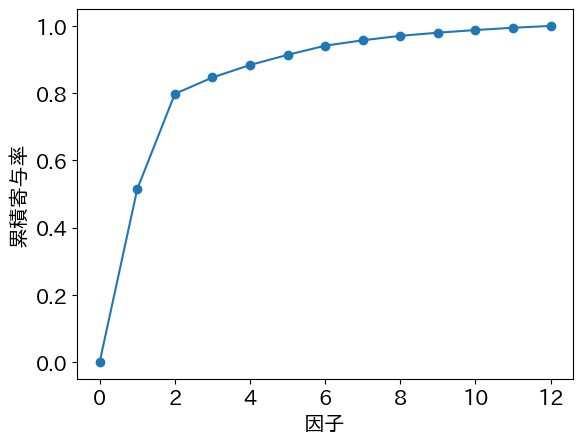

In [10]:
#寄与率の取得
evr = pca.explained_variance_ratio_

#行名・列名を付与してデータフレームに変換
pd.DataFrame(evr, index=["PC{}".format(x + 1) for x in range(len(df.columns))], columns=["寄与率"])

#起点0と寄与率の累積値をプロット
plt.plot([0] + list(np.cumsum(evr)), "-o")
plt.xlabel("因子")
plt.ylabel("累積寄与率")
plt.show()

In [11]:
#因子数を指定
n_components = 2

#因子分析の実行
fa = FA(n_components, max_iter=5000)   #モデルを定義
fitted = fa.fit_transform(z)   #fitとtransformを一括処理

print(fitted)
print(fitted.shape)

[[ 0.40620198  0.26037814]
 [ 0.76866297 -0.27589875]
 [ 2.24783714  0.35262667]
 [ 0.6836055  -1.09248225]
 [ 1.98092733 -0.04011182]
 [-0.19562506 -0.84652723]
 [ 1.77078019  0.68642904]
 [ 0.82309928 -0.52958903]
 [ 1.58405671 -0.30492503]
 [ 1.68292778  0.49776573]
 [-0.18912684 -0.73027315]
 [ 1.17410177 -0.84567215]
 [ 2.25063484  0.67128918]
 [ 1.15551989 -0.03391256]
 [ 0.31057899 -0.35601656]
 [-0.17969743 -1.81067038]
 [ 1.23996306 -0.61330758]
 [ 0.66227899 -0.93809818]
 [-0.31358919 -1.91787934]
 [ 0.55305128 -0.75254821]
 [-0.8295803   0.27786899]
 [-0.3019867  -0.03288365]
 [-1.53814795 -1.78177174]
 [-0.72579101 -0.98423323]
 [-0.04151061 -0.34230142]
 [-0.15595328 -1.09292702]
 [ 0.35924653  0.13841363]
 [-0.97021041 -0.24953893]
 [-0.95138295 -1.82670178]
 [-0.33921101 -0.16275855]
 [-1.44622888 -0.19200656]
 [-0.69542391 -0.13898655]
 [-1.05502259 -1.10747116]
 [-1.02764611  0.23554494]
 [-0.17851668  0.83497598]
 [-0.10469807  0.59517963]
 [-0.77033519 -0.87550797]
 

In [12]:
#因子負荷行列を取得する
fa.components_.T

#変数Factor_loading_matrixに格納
変数Factor_loading_matrix = fa.components_.T

#データフレームに変換
#result = pd.DataFrame(変数Factor_loading_matrix, columns=["第1因子","第2因子","第3因子","第4因子","第5因子"], index=[df.columns])
result = pd.DataFrame(変数Factor_loading_matrix, columns=["第1因子","第2因子"], index=[df.columns])

#結果をcsv出力
result.round(3).to_csv("FactorAnalyzer.csv", encoding="shift_jis", errors="ignore")

In [13]:
#因子得点の表示
df_point = pd.DataFrame(fitted)

result_point = pd.concat([df1,df2,df_point], axis=1)
result_point.columns = ["アンケート番号","回答者番号","第1因子","第2因子"]
result_point.round(3).to_csv("FactorScore.csv", encoding="shift_jis", errors="ignore")

C:\Users\Takuto\AppData\Local\Temp\ipykernel_22236\183408234.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(result_point, x="アンケート番号", y="第1因子", palette="Set3")


(-2.0, 2.5)

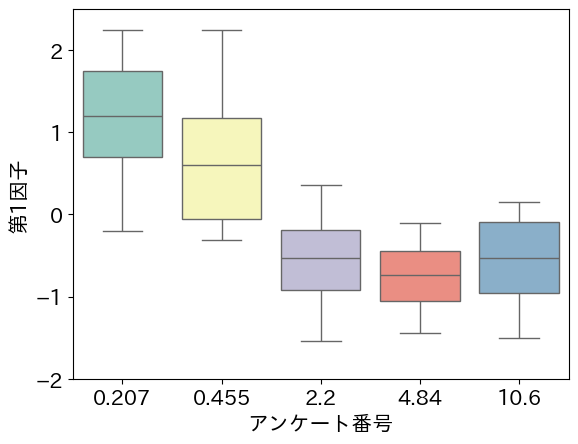

In [14]:
sns.boxplot(result_point, x="アンケート番号", y="第1因子", palette="Set3")
plt.ylim([-2,2.5])

C:\Users\Takuto\AppData\Local\Temp\ipykernel_22236\3298853729.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(result_point, x="アンケート番号", y="第2因子", palette="Set3")


(-2.0, 2.5)

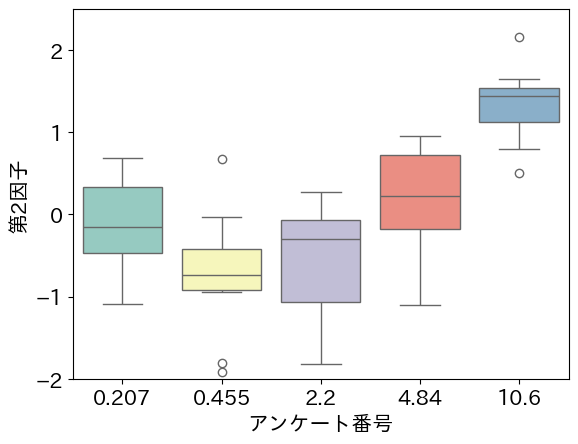

In [15]:
sns.boxplot(result_point, x="アンケート番号", y="第2因子", palette="Set3")
plt.ylim([-2,2.5])

C:\Users\Takuto\AppData\Local\Temp\ipykernel_22236\3520783755.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(result_point, x="アンケート番号", y="第1因子", palette="Set3",)


AttributeError: module 'matplotlib.pyplot' has no attribute 'x_label'

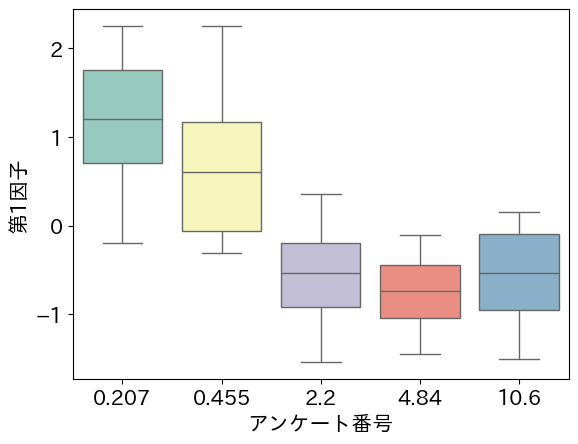

In [16]:
sns.boxplot(result_point, x="アンケート番号", y="第1因子", palette="Set3",)
plt.x_label("magnification")
plt.y_label("magnification")

plt.show()